#  Tumor classification with mobilenet
dataset 
#  [here](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset)


# Import libreries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
print(os.getcwd())

D:\Python\miniproject\Brain-Tumor-Detection\Notebooks


# Set Up Paths and Parameters

In [2]:
# Paths to  dataset
train_dir = '../Data_Set/Train'
test_dir = '../Data_Set/Validation'

# Image size and batch size
img_size = 224  # MobileNet requires 224x224 images
batch_size = 32  #
num_classes = 4  # Normal, Glioma, Pituitary, Meningioma


# Data Augmentation and Preprocessing

In [3]:
# Training Data Generator with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation/Test Data Generator (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'  # Since this is multi-class classification
)

# Validation data
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 24464 images belonging to 4 classes.
Found 5720 images belonging to 4 classes.


# Load MobileNet Base Model

In [4]:
# Load MobileNet with pre-trained weights, without the top layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze the base model layers so they are not trainable
base_model.trainable = False


# Build the Model

In [5]:
# Add custom layers on top of MobileNet
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling layer
x = Dense(1024, activation='relu')(x)  # Fully connected layer
x = Dense(512, activation='relu')(x)  # Another fully connected layer

# Output layer (4 classes: Notumor, Glioma, Pituitary, Meningioma)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()  # Print model architecture


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,805,316 (18.33 MB)

 Trainable params: 1,576,452 (6.01 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

# Train the Model

In [6]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,  # Adjust the number of epochs
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)


D:\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
764/764 ━━━━━━━━━━━━━━━━━━━━ 0s 639ms/step - accuracy: 0.7707 - loss: 0.5896

D:\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


764/764 ━━━━━━━━━━━━━━━━━━━━ 572s 745ms/step - accuracy: 0.7708 - loss: 0.5894 - val_accuracy: 0.8883 - val_loss: 0.3021
Epoch 2/20
  1/764 ━━━━━━━━━━━━━━━━━━━━ 5:49 458ms/step - accuracy: 0.8438 - loss: 0.5359

D:\Python\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


764/764 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.8438 - loss: 0.5359 - val_accuracy: 0.9167 - val_loss: 0.2006
Epoch 3/20
764/764 ━━━━━━━━━━━━━━━━━━━━ 571s 747ms/step - accuracy: 0.8815 - loss: 0.3211 - val_accuracy: 0.9134 - val_loss: 0.2334
Epoch 4/20
764/764 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.9688 - loss: 0.1483 - val_accuracy: 0.9583 - val_loss: 0.1966
Epoch 5/20
764/764 ━━━━━━━━━━━━━━━━━━━━ 571s 747ms/step - accuracy: 0.9068 - loss: 0.2594 - val_accuracy: 0.9342 - val_loss: 0.1922
Epoch 6/20
764/764 ━━━━━━━━━━━━━━━━━━━━ 1s 565us/step - accuracy: 0.9688 - loss: 0.1189 - val_accuracy: 0.9167 - val_loss: 0.2341
Epoch 7/20
764/764 ━━━━━━━━━━━━━━━━━━━━ 569s 745ms/step - accuracy: 0.9239 - loss: 0.2134 - val_accuracy: 0.9350 - val_loss: 0.1833
Epoch 8/20
764/764 ━━━━━━━━━━━━━━━━━━━━ 1s 483us/step - accuracy: 0.9062 - loss: 0.2648 - val_accuracy: 0.9167 - val_loss: 0.2350
Epoch 9/20
764/764 ━━━━━━━━━━━━━━━━━━━━ 564s 738ms/step - accuracy: 0.9314 - loss: 0.1880 - val

# Visualize Training Results (Accuracy & Loss)

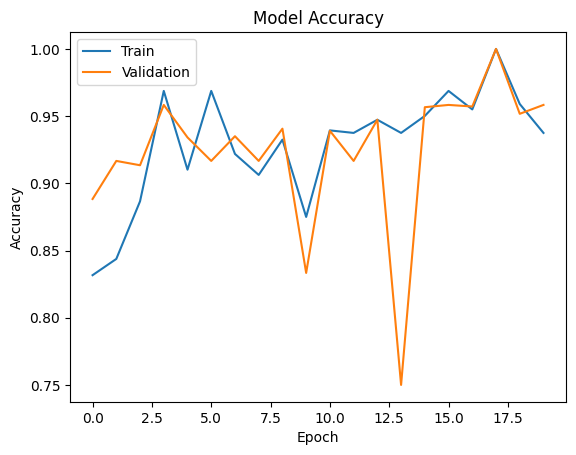

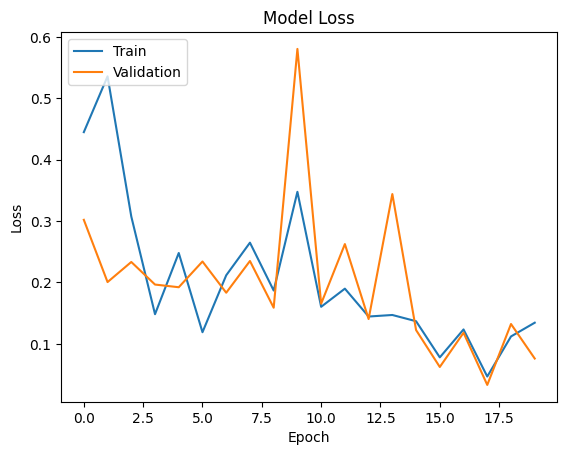

In [7]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Save the model

In [11]:

model.save('model/brain_tumor_classification_mobilenet_mod.h5')


# Prediction validation and plotting confusion matrix with f1 score
These are key performance metrics in binary or multiclass classification tasks. They help evaluate how well a model performs in predicting the true class labels. Here's what each term means along with its formula:

1. Accuracy
Definition: Accuracy is the ratio of correctly predicted instances to the total instances. It tells us the overall correctness of the model but may not be ideal in the case of imbalanced datasets.

 
Where:

TP (True Positive): The model correctly predicted a positive class (e.g., "Tumor Detected").
TN (True Negative): The model correctly predicted a negative class (e.g., "No Tumor").
FP (False Positive): The model incorrectly predicted a positive class (false alarm).
FN (False Negative): The model incorrectly predicted a negative class (missed detection).
2. Precision
Definition: Precision (or Positive Predictive Value) is the ratio of correctly predicted positive instances to the total predicted positives. It indicates how reliable the model’s positive predictions are.



 
High precision means that most predicted positives are actual positives.
A model with high precision has fewer false positives.
3. Recall (Sensitivity or True Positive Rate)
Definition: Recall is the ratio of correctly predicted positive instances to all actual positives. It shows how well the model captures the positive class.


 
High recall means that the model is capturing most of the actual positives.
A model with high recall has fewer false negatives.
4. F1-Score (Harmonic Mean of Precision and Recall)
Definition: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, especially useful when the dataset is imbalanced.



The F1-score ranges from 0 to 1, where 1 indicates perfect precision and recall.
It's a good metric to consider when there is an uneven class distribution, as it penalizes extreme values of precision or recall.

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score

In [25]:
# Load the saved model
model = load_model('../model/brain_tumor_classification_mobilenet_mod.h5')

# Define the image size
img_size = 224  # Image size used for MobileNet (replace if different)

# Load and preprocess a test image
img_path = '../an.jpg'  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(img_size, img_size))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

# Class mapping (adjust to your class indices)
class_indices = {0: 'notumor', 1: 'Glioma', 2: 'Pituitary', 3: 'Meningioma'}
print(f"Predicted class: {class_indices[predicted_class[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step
Predicted class: Meningioma


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming your test set is in 'Dataset/Testing' folder, set the path
test_dir = '../Data_Set/Validation'

# Image data generator for test images
test_datagen = ImageDataGenerator(rescale=1./255)

# Test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Generate predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes


Found 5720 images belonging to 4 classes.


D:\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 78s 433ms/step


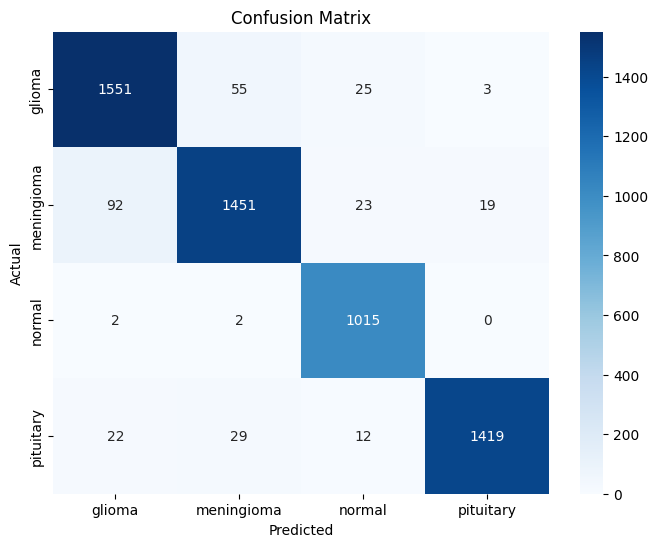

Classification Report:
              precision    recall  f1-score   support

      glioma       0.93      0.95      0.94      1634
  meningioma       0.94      0.92      0.93      1585
      normal       0.94      1.00      0.97      1019
   pituitary       0.98      0.96      0.97      1482

    accuracy                           0.95      5720
   macro avg       0.95      0.95      0.95      5720
weighted avg       0.95      0.95      0.95      5720



In [15]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


In [16]:
# Generate predictions (from the previous step)
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes


179/179 ━━━━━━━━━━━━━━━━━━━━ 77s 430ms/step


In [17]:
# Calculate F1 score for each class
f1 = f1_score(y_true, y_pred, average=None)  # F1 score for each class
print(f"F1 Score for each class: {f1}")

# Calculate macro and weighted F1 score
f1_macro = f1_score(y_true, y_pred, average='macro')  # Macro average F1 score
f1_weighted = f1_score(y_true, y_pred, average='weighted')  # Weighted average F1 score

print(f"Macro F1 Score: {f1_macro}")
print(f"Weighted F1 Score: {f1_weighted}")


F1 Score for each class: [0.93971524 0.92953235 0.96943649 0.97092029]
Macro F1 Score: 0.9524010903588803
Weighted F1 Score: 0.9502732726061683


# Acccuracy,precision,recall and  F score 

# Testing with another dataset

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming your test set is in 'Dataset/Testing' folder, set the path
test_dir = '../btdata/testing'
img_size = 224
# Image data generator for test images
test_datagen = ImageDataGenerator(rescale=1./255)

# Test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Generate predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes


Found 1311 images belonging to 4 classes.


D:\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 445ms/step


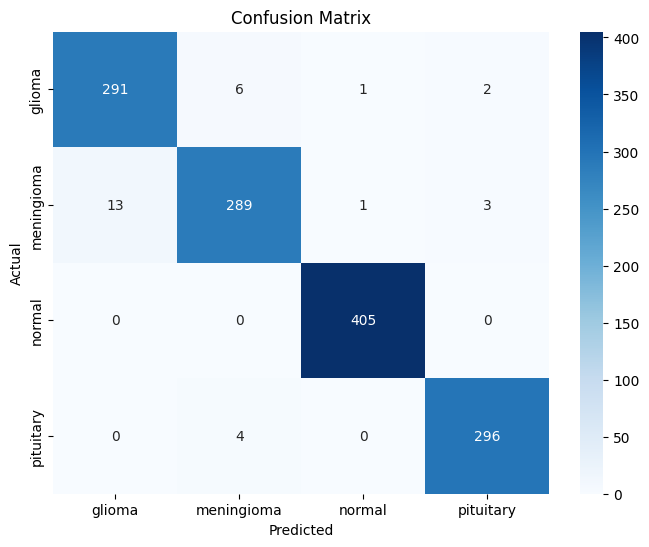

Classification Report:
              precision    recall  f1-score   support

      glioma       0.96      0.97      0.96       300
  meningioma       0.97      0.94      0.96       306
      normal       1.00      1.00      1.00       405
   pituitary       0.98      0.99      0.99       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98      0.98      0.98      1311



In [20]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


# modifying function to detect presence of tumor

In [29]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

# Load the trained model (multi-class model)
model = load_model('../model/brain_tumor_classification_mobilenet_mod.h5')

# Directory for validation data (binary classification with 'yes' and 'no' subfolders)
validation_data_dir = '../Dataset/validation/'  # Update with your actual validation data path

# Define the image size based on your training configuration
image_size = (224, 224)  # Adjust if needed based on your model's input size

# Initialize the ImageDataGenerator for the validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create the validation data generator
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='binary',  # Binary classification (Tumor or No Tumor)
    shuffle=False
)

# Get predictions on the validation data
predictions = model.predict(validation_generator)

# For multi-class, use argmax to get the predicted class
predicted_classes = np.argmax(predictions, axis=1)

# Map multi-class predictions to binary labels (Tumor or No Tumor)
# Assuming class indices for multi-class are: 0=Normal, 1=Glioma, 2=Pituitary, 3=Meningioma
# Any class other than 'Normal' (0) is treated as "Tumor"
binary_predictions = np.where(predicted_classes == 0, 0, 1)

# Get the true labels
true_classes = validation_generator.classes

# Display the confusion matrix
conf_matrix = confusion_matrix(true_classes, binary_predictions)
print('Confusion Matrix')
print(conf_matrix)

# Display the classification report
class_report = classification_report(true_classes, binary_predictions, target_names=['No Tumor', 'Tumor'])
print('Classification Report')
print(class_report)


Found 52 images belonging to 2 classes.


D:\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/stepWARNING:tensorflow:6 out of the last 226 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002795340E660> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 782ms/step
Confusion Matrix
[[ 0 20]
 [11 21]]
Classification Report
              precision    recall  f1-score   support

    No Tumor       0.00      0.00      0.00        20
       Tumor       0.51      0.66      0.58        32

    accuracy                           0.40        52
   macro avg       0.26      0.33      0.29        52
weighted avg       0.32      0.40      0.35        52



# plot a matrix

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))